In [36]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pylab, pyplot as plt
from sklearn import manifold, datasets
from sklearn.calibration import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import preprocessing
import sweetviz # type: ignore



In [37]:

df = pd.read_csv(r"1632560262896716.csv")

df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)

df = df.dropna()

print(df.isna().sum())
df = df.drop('CustomerID', axis=1)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



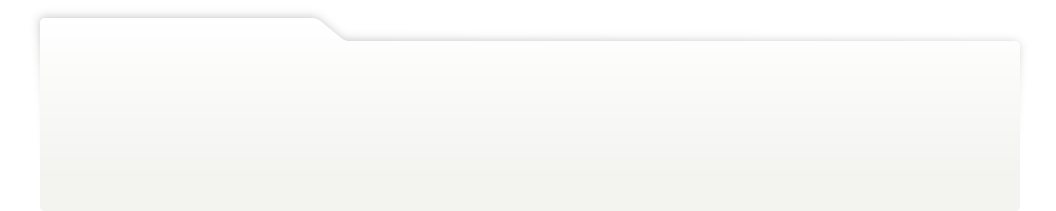
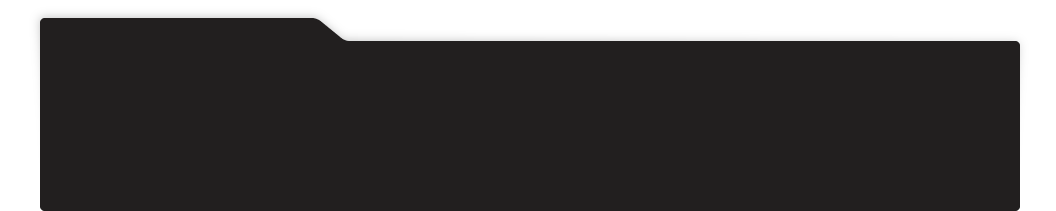
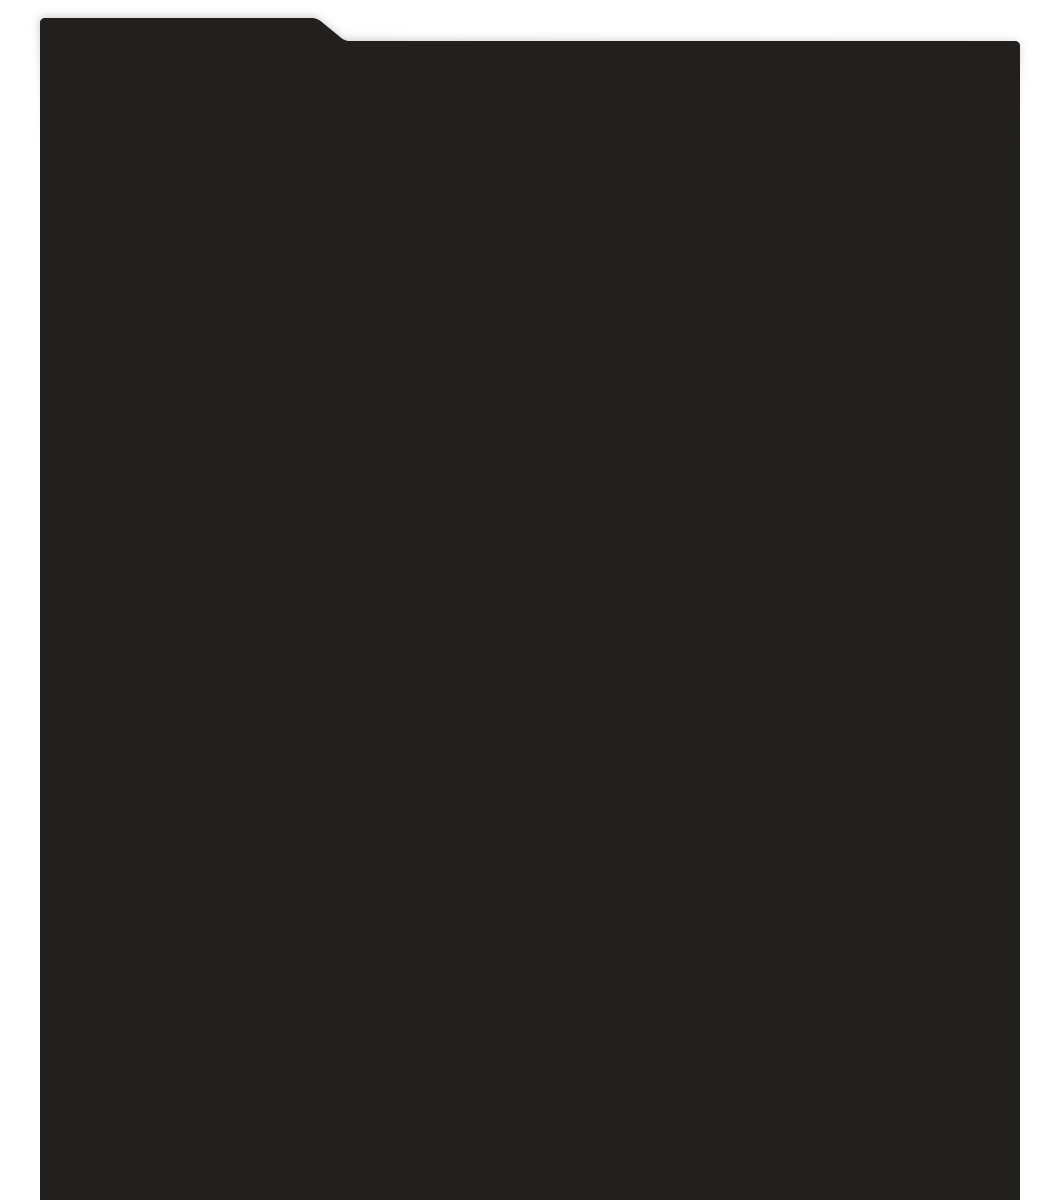
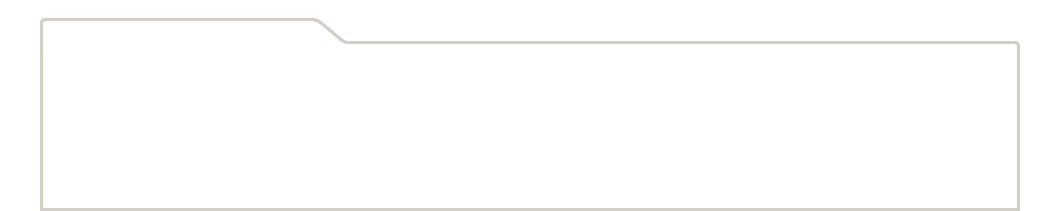
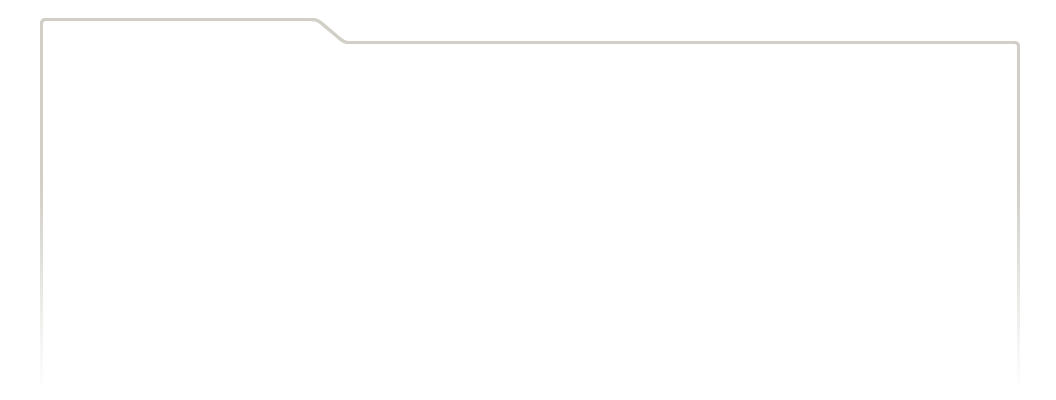
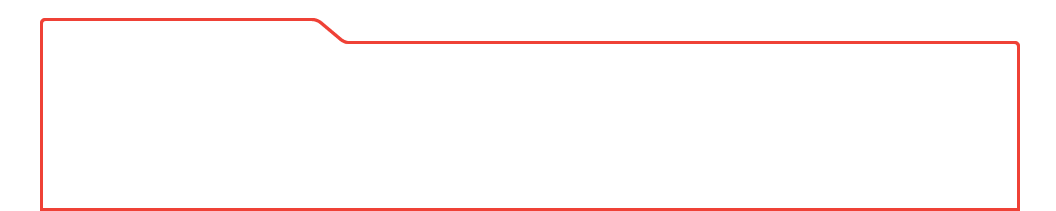
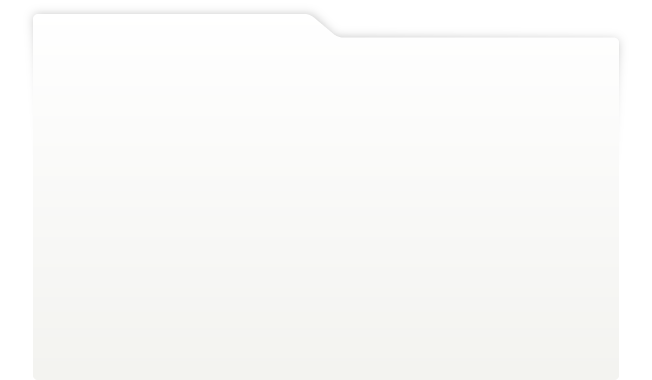
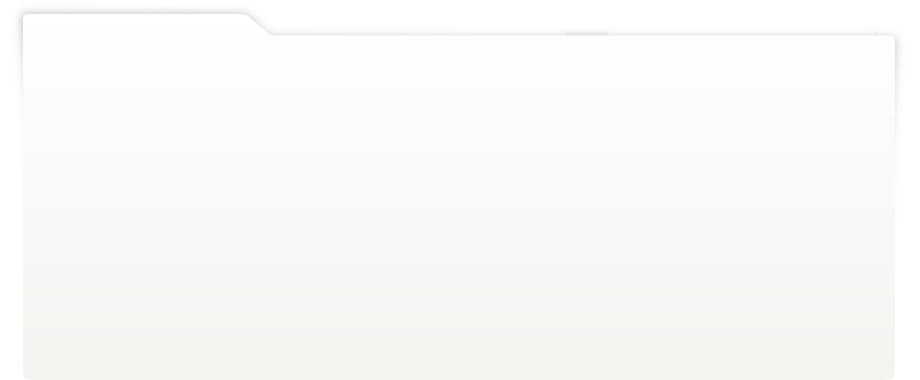
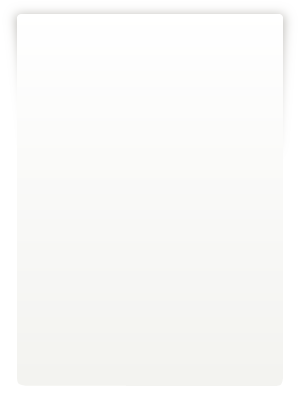
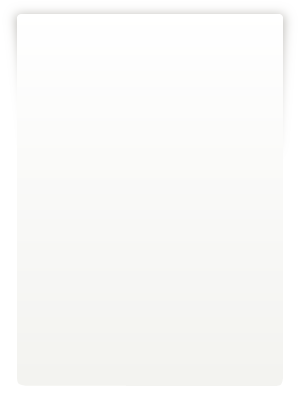
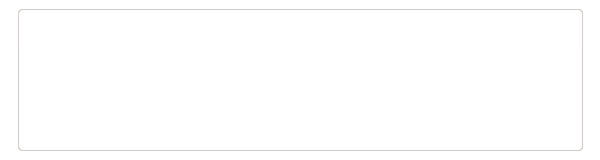
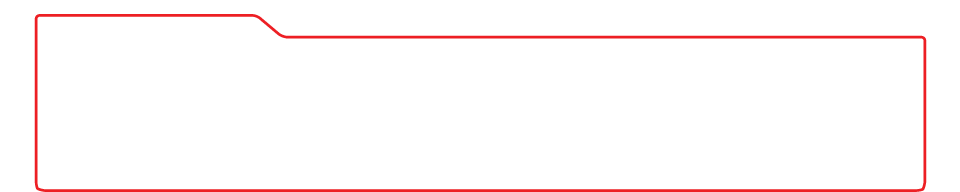
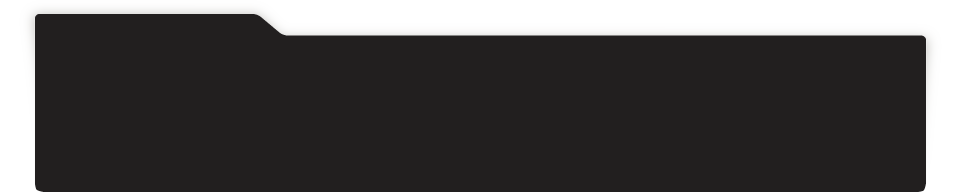
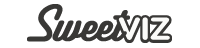
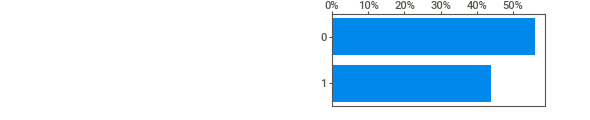
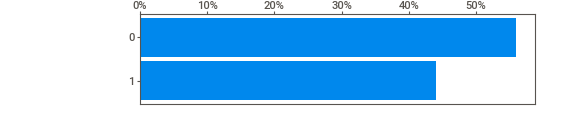
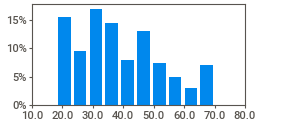
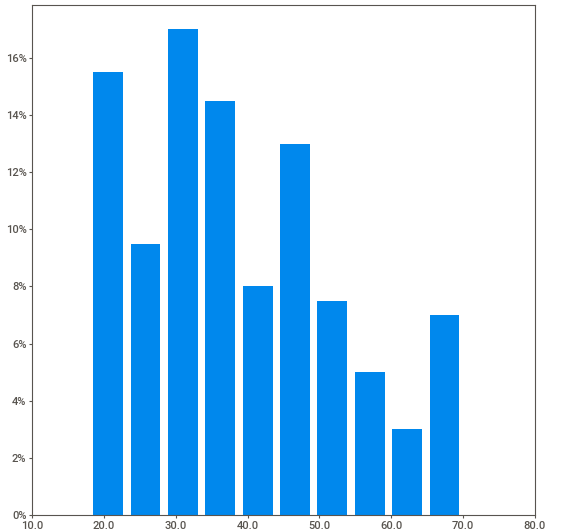
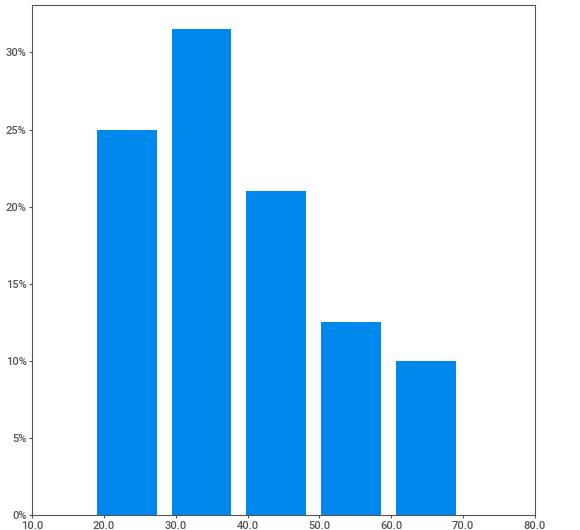
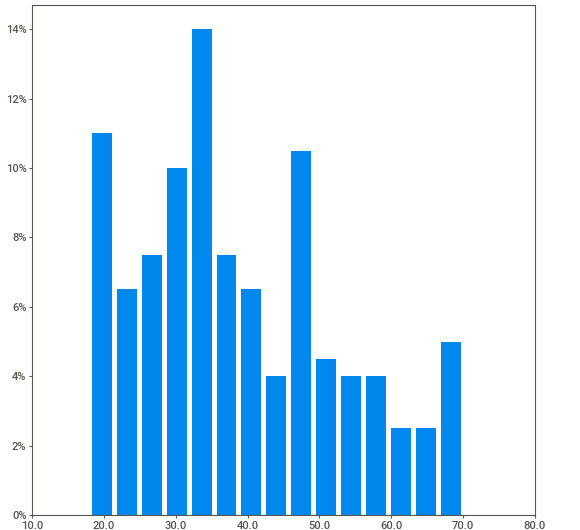
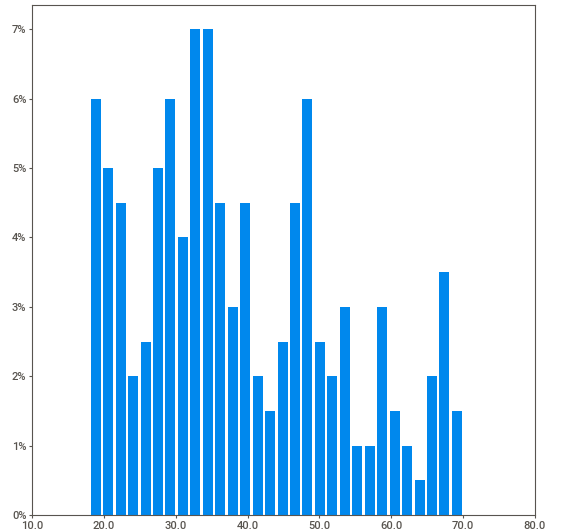
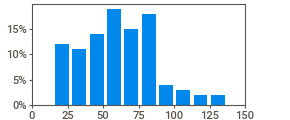
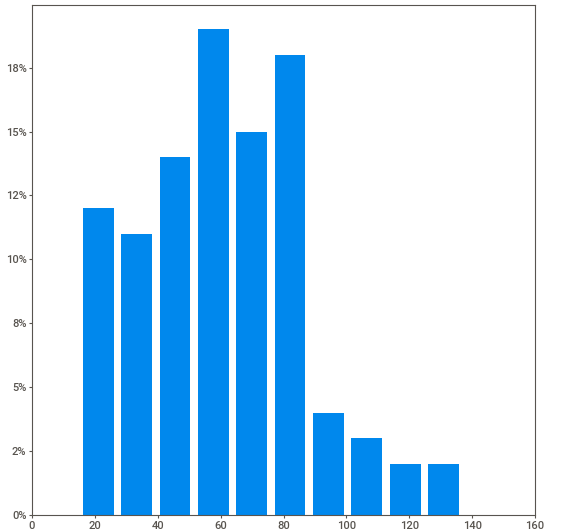
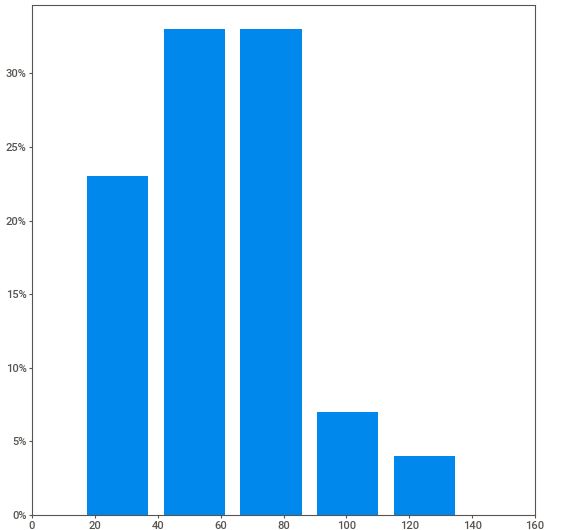
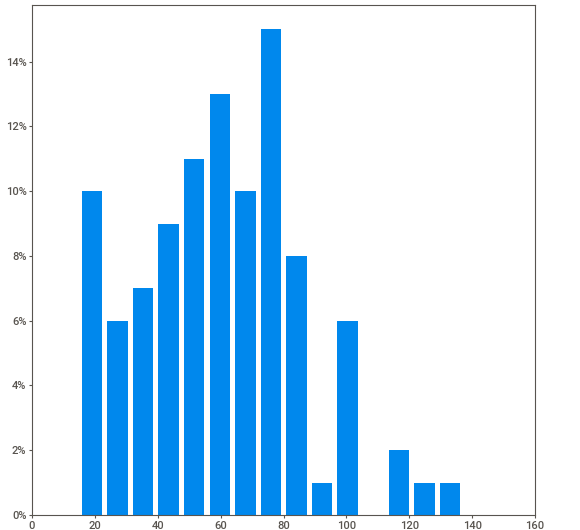
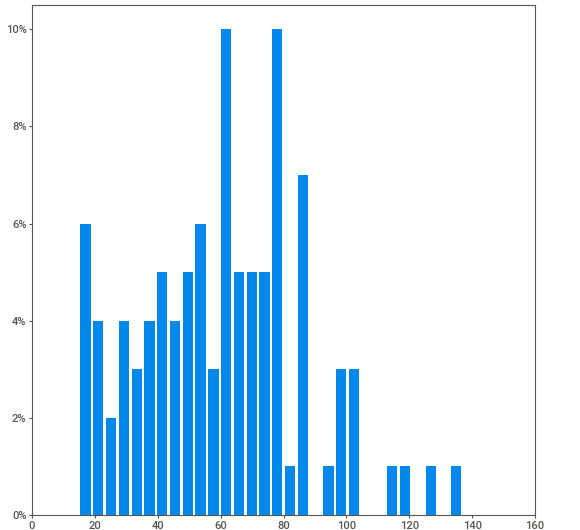
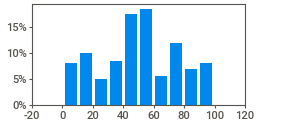
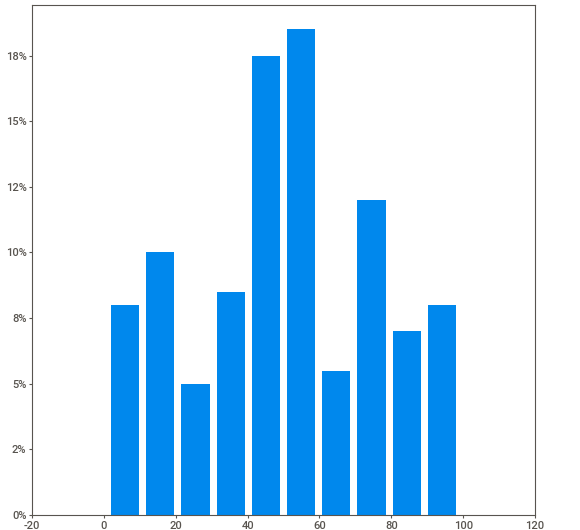
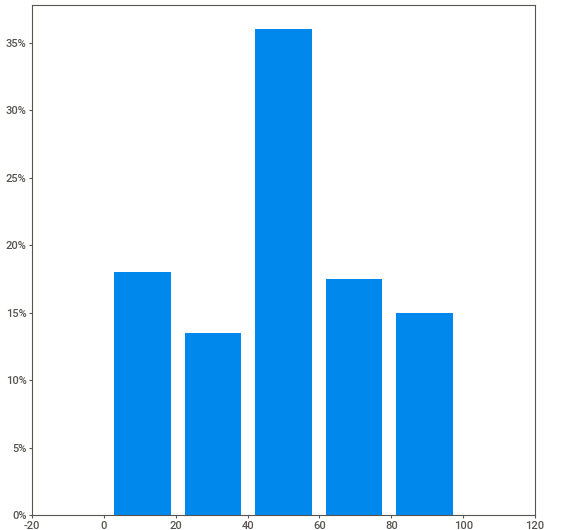
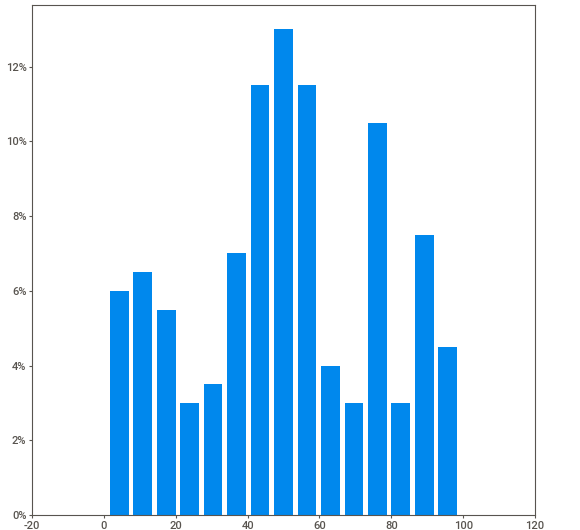
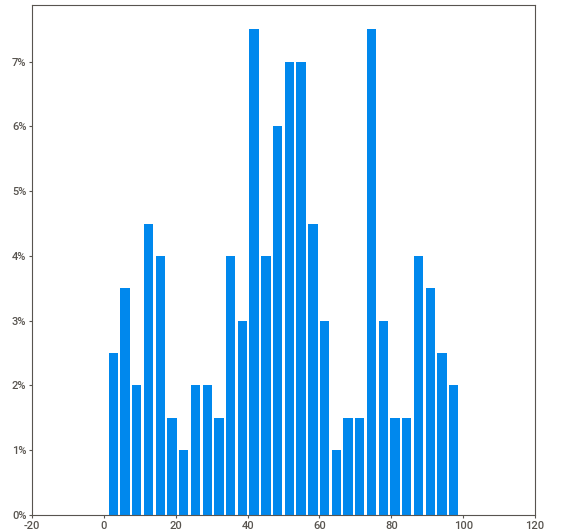
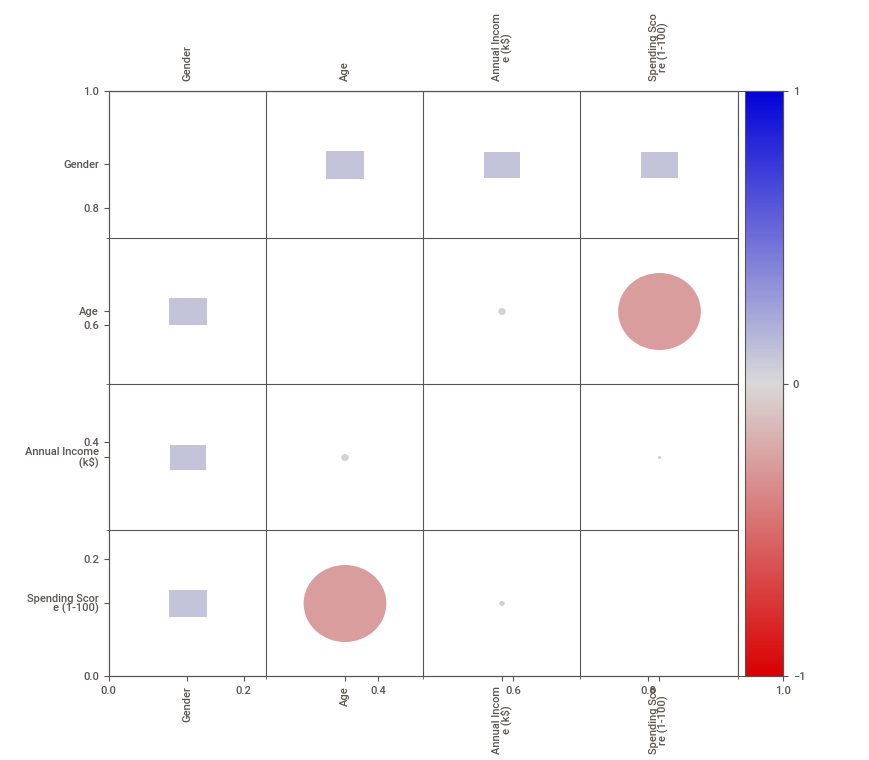
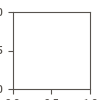

In [38]:
le_sex = LabelEncoder()
df['Gender'] = le_sex.fit_transform(df['Gender'])

X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

report = sweetviz.analyze(df)

report.show_html()
report.show_notebook()

In [39]:
clusterNumber = 5
k_means = KMeans(init="k-means++", n_clusters=clusterNumber, n_init=12)
k_means.fit(X)
df['clustering_label'] = k_means.labels_

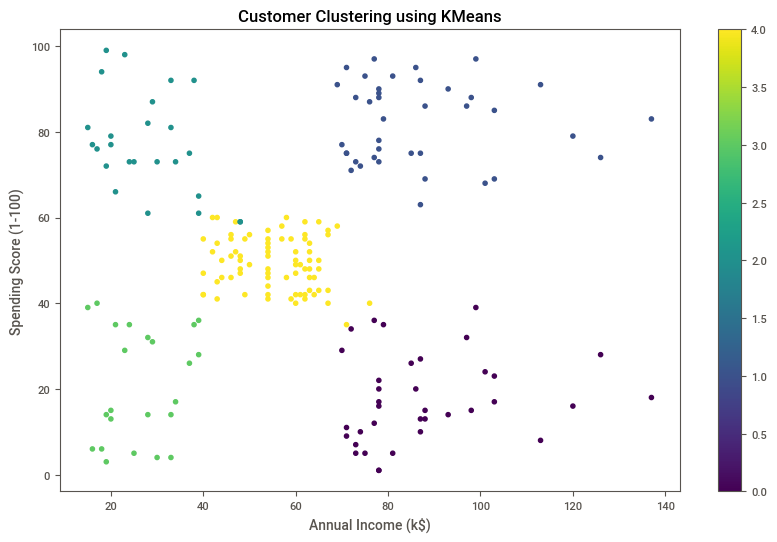

In [40]:





plt.figure(figsize=(10, 6))

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['clustering_label'], cmap='viridis', marker='o')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clustering using KMeans')
plt.colorbar()
plt.show()


In [41]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pylab, pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.calibration import LabelEncoder
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

In [42]:


df = pd.read_csv(r"1632560262896716.csv")
print(df.info())


le_sex = LabelEncoder()
df['Gender'] = le_sex.fit_transform(df['Gender'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [43]:

print ("Shape of dataset before cleaning: ", df.size)
df[['Gender','Age',	'Annual Income (k$)','Spending Score (1-100)']] = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset before cleaning:  1000
Shape of dataset after cleaning:  1000


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [44]:


X = df[['Gender','Age',	'Annual Income (k$)','Spending Score (1-100)']].values
print(df)



     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [45]:



distnce=euclidean_distances(X,X) 
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(distnce)

df['clustering']=agglom.labels_


c:\Users\sahar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


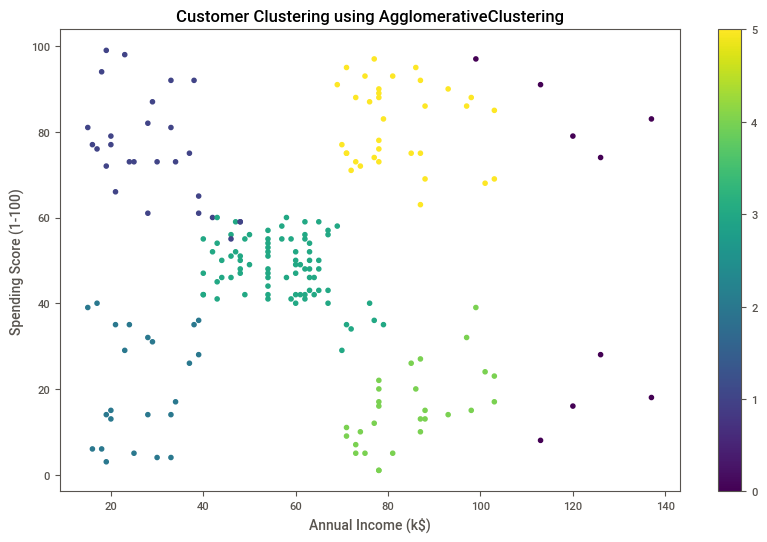

In [46]:


plt.figure(figsize=(10, 6))

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['clustering'], cmap='viridis', marker='o')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clustering using AgglomerativeClustering')
plt.colorbar()
plt.show()

